### Import libraries

In [370]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from numpy.fft import fftshift, ifft2, ifftshift, hfft, ihfft

plt.rcParams["figure.dpi"] = 100

### Useful functions

In [371]:
def plot_mag_phase(im, y, title):
       n = np.shape(im)[0]
       fig, (ax1, ax2) = plt.subplots(1, 2)
       fig.suptitle(title, y=y)
       ax1.imshow(np.abs(im),vmin=np.min(np.abs(im)), vmax=np.max(np.abs(im))/90,
              extent=[-n/2, n/2, -n/2, n/2], cmap='gray')
       ax2.imshow(np.angle(im), extent=[-n/2, n/2, -n/2, n/2], 
                     vmin=np.min(np.angle(im)), vmax=np.max(np.angle(im)), cmap='gray')

       ax1.set_title('Magnitude')
       ax2.set_title('Angle')
       
       fig.tight_layout()
       
def plot_reconstructed_image(im, y, title):
       n = np.shape(im)[0]
       im_fft = fftshift(ifft2(ifftshift(im)))
       fig, (ax1, ax2) = plt.subplots(1, 2)
       fig.suptitle(title, y=y)
       ax1.imshow(np.abs(im_fft),vmin=np.min(np.abs(im_fft)), vmax=np.max(np.abs(im_fft)),
              extent=[-n/2, n/2, -n/2, n/2], cmap='gray')
       ax2.imshow(np.angle(im_fft), extent=[-n/2, n/2, -n/2, n/2], 
                     vmin=np.min(np.angle(im_fft)), vmax=np.max(np.angle(im_fft)), cmap='gray')

       ax1.set_title('Magnitude')
       ax2.set_title('Angle')
       
       fig.tight_layout()

### Question 0
Load the MRI raw data (rawdata.mat) obtained from a phantom using a spin-warp imaging pulse sequence using either load in Matlab or loadmat in Python

In [372]:
x = loadmat('rawdata.mat')

im = np.array(x['rawdata'])

### Question 1
Display the magnitude and phase of the 2D _k_-space data.

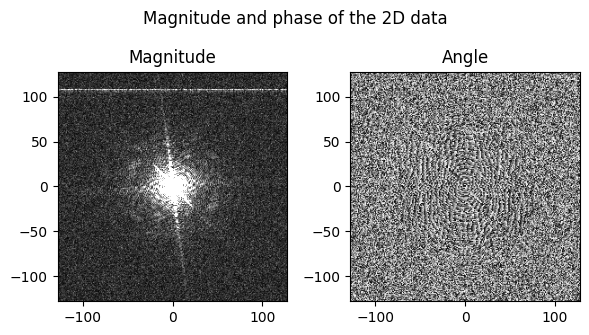

In [373]:
plot_mag_phase(im, title='Magnitude and phase of the 2D data', y=0.9)

### Question 2
Reconstruct the image by Fourier transform (in Matlab use fftshift(ifft2(ifftshift(rawdata))) or the equivalent numpy functions in
Python). Display the magnitude and phase of the reconstructed image.

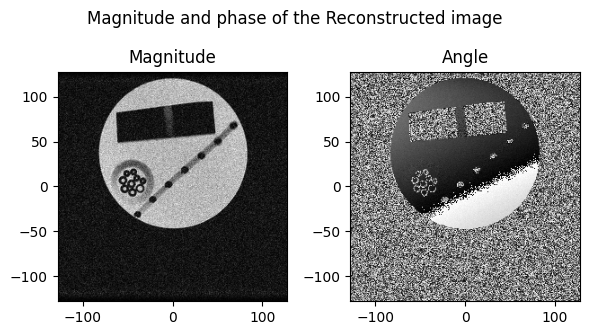

In [374]:
plot_reconstructed_image(im, y=0.9, title='Magnitude and phase of the Reconstructed image')

### Question 3
Repeat 1-2, by truncating the _k_-space data (i.e., reducing $k_{max}$ and leaving $\Delta k$
unchanged), by one half, one fourth and one eighth, along the phase-encoding direction

In [375]:
# phase-encoding direction -> Y
y, x = np.shape(im)
k_max = int(y/2)
# reducing by one half
im2 = im[int(k_max-k_max/2):int(k_max+k_max/2), :]

# reducing by one fourth
im4 = im[int(k_max-k_max/4):int(k_max+k_max/4),  :]

# reducing by one eighth
im8= im[int(k_max-k_max/8):int(k_max+k_max/8), :]

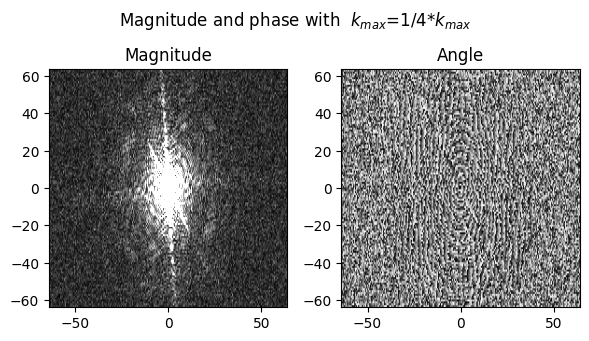

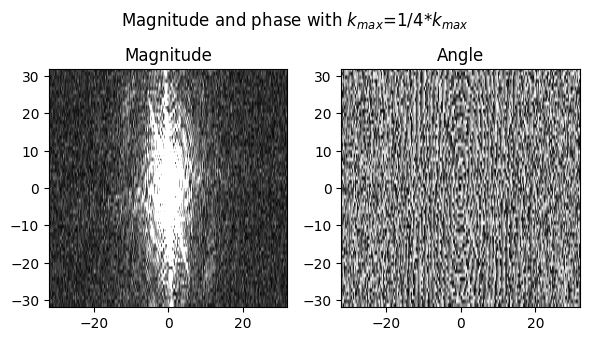

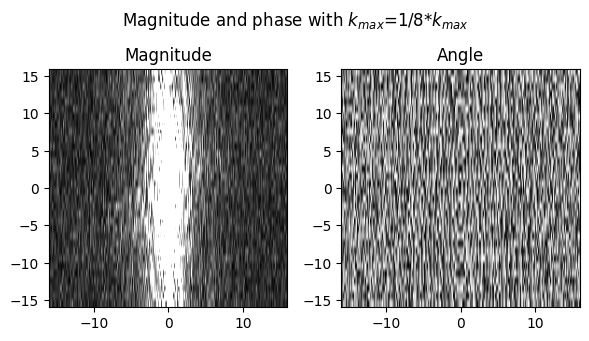

In [376]:
### Repeat 1

plot_mag_phase(im2, y=0.9, title= r'Magnitude and phase with  $k_{max}$=1/4*$k_{max}$')
plot_mag_phase(im4, y=0.9, title= r'Magnitude and phase with $k_{max}$=1/4*$k_{max}$')
plot_mag_phase(im8, y=0.9, title= r'Magnitude and phase with $k_{max}$=1/8*$k_{max}$')

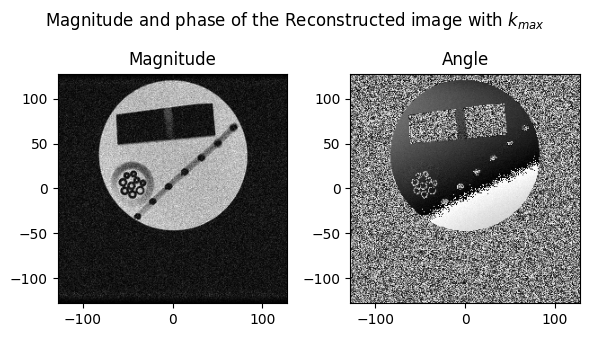

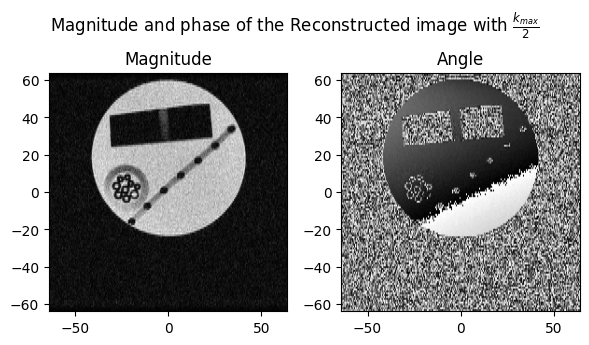

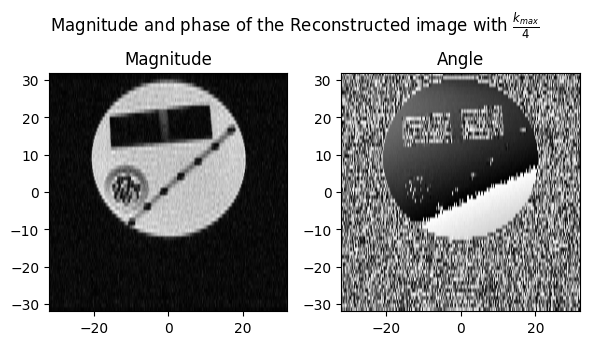

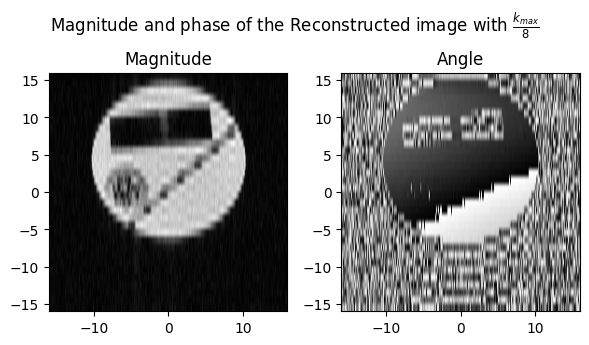

In [377]:
# Repeat 2
plot_reconstructed_image(im, title= r'Magnitude and phase of the Reconstructed image with $k_{max}$',  y=0.9)

plot_reconstructed_image(im2, title= r'Magnitude and phase of the Reconstructed image with $\frac{k_{max}}{2}$',  y=0.9)

plot_reconstructed_image(im4, title=r'Magnitude and phase of the Reconstructed image with $\frac{k_{max}}{4}$',  y=0.9)

plot_reconstructed_image(im8, title=r'Magnitude and phase of the Reconstructed image with $\frac{k_{max}}{8}$',  y=0.9)

This is a clear example of *Gibbs ringing*

### Question 4

Repeat 1-2, by under-sampling the _k_-space data (i.e., leaving $k_{max}$ unchanged and
increasing $\Delta k$) by half along the phase-encoding directio

In [378]:
im_half_fov = [im[i, :] for i in range(0, y, 2)]
# Repeat 1 
plot_mag_phase(im_half_fov, title='Magnitude and phase with $2*\Delta k$',  y=0.85)

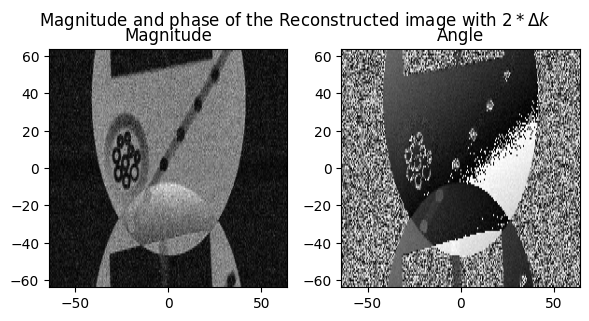

In [379]:
# Repeat 2
plot_reconstructed_image(im_half_fov, title='Magnitude and phase of the Reconstructed image with $2*\Delta k$',  y=0.85)

### Question 5
Repeat 1-2, by considering half Fourier imaging along the phase-encoding direction, i.e., sampling only half the phase-encoding steps and then using Hermitian symmetry to obtain a full k-space before image reconstruction:

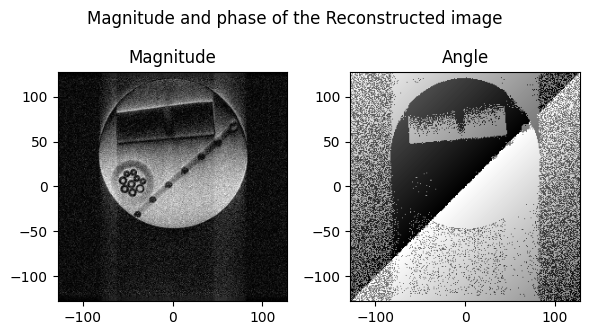

In [382]:
n = np.shape(im)[0]
rawdata_halfFourier = im[:n//2, :]
rawdata_hermit = np.conj(rawdata_halfFourier[::-1, ::-1])
rawdata_full = np.concatenate((rawdata_halfFourier, rawdata_hermit), axis=0)

plot_mag_phase(rawdata_full, title='Magnitude and phase of the 2D data', y=0.9)
plot_reconstructed_image(rawdata_full, y=0.9, title='Magnitude and phase of the Reconstructed image')

### Question 6
Repeat 5, by considering 5/8 partial Fourier imaging. i.e., by adding 1/8 of the data points in the unsampled half of k-space. Explain the observed differences relative to 5

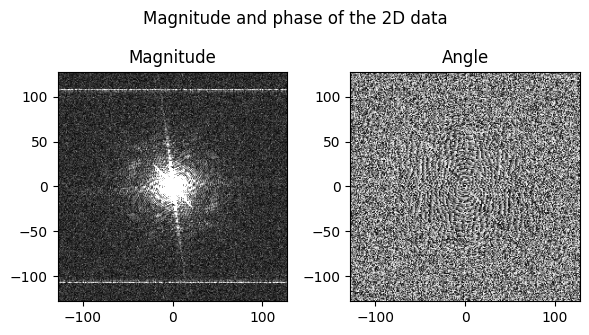

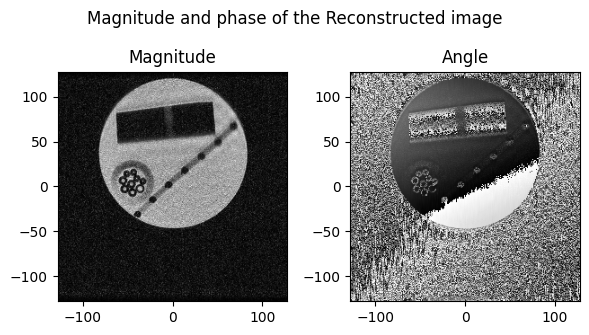

In [389]:
# Modify the raw data by adding 1/8 of the data points in the unsampled half of k-space
n = np.shape(im)[0]
rawdata_partial = np.copy(rawdata_full)
n_samples = n // 2
n_added = n_samples // 8

# Add 1/8 of the data points in the unsampled half of k-space
rawdata_partial[n_samples : n_samples + n_added, :] = im[n_samples : n_samples + n_added, :]
rawdata_partial_copy = rawdata_partial.copy()
rawdata_partial_copy[rawdata_full == rawdata_partial] = 0
plot_mag_phase(rawdata_partial_copy, title='Added part', y=0.9)
plot_mag_phase(rawdata_partial, title='Magnitude and phase of the 2D data', y=0.9)
plot_reconstructed_image(rawdata_partial, y=0.9, title='Magnitude and phase of the Reconstructed image')